<a href="https://colab.research.google.com/github/tanuj-cmd-15/IR_Assignments/blob/master/IR_Assi6_pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

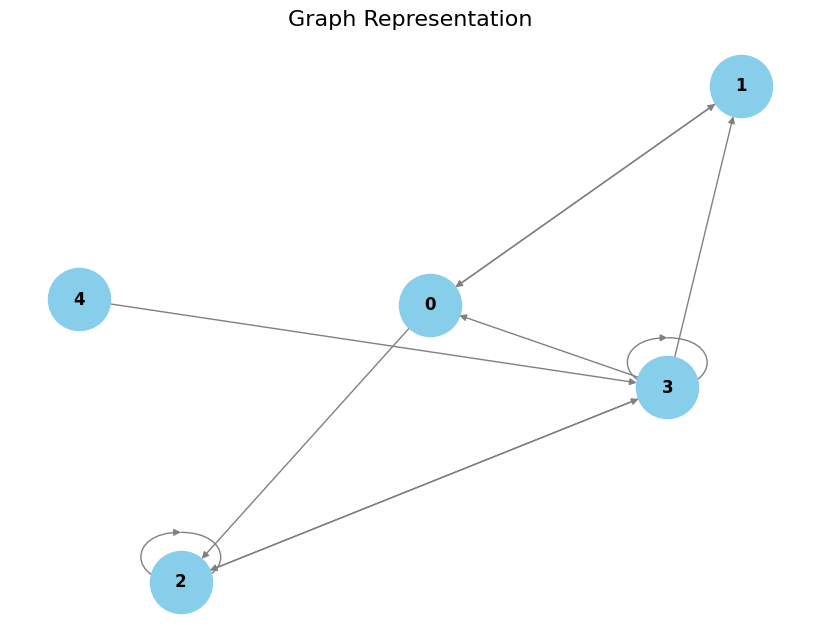

Final PageRank Values:
Node 0: 0.2375
Node 1: 0.2125
Node 2: 0.3375
Node 3: 0.4125
Node 4: 0.2000


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def page_rank_iteration(graph, iterations=10):

    n = len(graph)
    ranks = {node: 1 / n for node in range(n)}
    inlinks = {node: [] for node in range(n)}

    for node, outlinks in enumerate(graph):
        for link in outlinks:
            inlinks[link].append(node)

    for _ in range(iterations):
        new_ranks = {}
        for node in range(n):
            if node == 4:
                new_ranks[node] = 1 / n
            else:

                new_rank = 0
                for inlink in inlinks[node]:
                    new_rank += ranks[inlink] / len(graph[inlink])
                new_ranks[node] = new_rank
        ranks = new_ranks

    return ranks


def draw_graph(graph):

    G = nx.DiGraph()
    for node, outlinks in enumerate(graph):
        for link in outlinks:
            G.add_edge(node, link)

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=12, font_weight='bold')
    plt.title("Graph Representation", fontsize=16)
    plt.show()


graph = [
    [1, 2],
    [0],
    [2, 3],
    [1, 0, 2, 3],
    [3]
]

draw_graph(graph)

final_ranks = page_rank_iteration(graph, iterations=2)

# Output final ranks
print("Final PageRank Values:")
for node, rank in final_ranks.items():
    print(f"Node {node}: {rank:.4f}")
